In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('credit_scoring_eng.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (21525, 12)

First 5 rows:
   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42       masters degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  \
0            married                 0      F    employee     0   
1            married                 0      F    employee     0   
2            married                 0      M    employee     0   
3            married                 0      M    employee     0   
4  civil partnership                 1      F     retiree     0   

    total_income                  purpose  
0  253875.639453    purchase of the house  
1  112080.

In [3]:
print("Dataset dimensions:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
print(df.describe())

Dataset dimensions: (21525, 12)

Column names:
['children', 'days_employed', 'dob_years', 'education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']

Basic statistics:
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  1.935100e+04  
mean           0.972544      0.080883  1.674223e+05  
std     

In [5]:
print("First 10 records (selected columns):")
print(df.iloc[:10, [0, 2, 4, -1]])

high_income = df.loc[df['total_income'] > df['total_income'].quantile(0.8)]
print(f"\nHigh-income customers (top 20%): {len(high_income)}")

print("\nCrosstab - Family Status vs Education:")
crosstab_result = pd.crosstab(df['family_status'], df['education'], margins=True)
print(crosstab_result)

First 10 records (selected columns):
   children  dob_years  education_id                              purpose
0         1         42             0                purchase of the house
1         1         36             1                         car purchase
2         0         33             1                purchase of the house
3         3         32             1              supplementary education
4         0         53             1                    to have a wedding
5         0         27             0                purchase of the house
6         0         43             0                 housing transactions
7         0         50             1                            education
8         2         35             0                     having a wedding
9         0         41             1  purchase of the house for my family

High-income customers (top 20%): 3870

Crosstab - Family Status vs Education:
education          ACADEMIC DEGREE  Academic Degree  BACHELOR DEGREE  

In [6]:
df_sorted = df.sort_values('total_income', ascending=False)
print("Top 5 highest income customers:")
print(df_sorted[['total_income', 'education', 'debt']].head())

education_groups = df.groupby('education')
print("\nIncome statistics by education:")
print(education_groups['total_income'].agg(['mean', 'median', 'std', 'count']))

Top 5 highest income customers:
       total_income            education  debt
12412  2.265604e+06       masters degree     0
19606  2.200852e+06       masters degree     1
9169   1.726276e+06  secondary education     0
20809  1.715018e+06  secondary education     0
17178  1.711309e+06       masters degree     0

Income statistics by education:
                              mean         median            std  count
education                                                              
ACADEMIC DEGREE      198570.757322  198570.757322            NaN      1
Academic Degree       98752.495442   98752.495442            NaN      1
BACHELOR DEGREE      176496.585093  163911.559034   76508.829800     22
Bachelor Degree      159188.363670  160402.480835   66286.356891     40
MASTERS DEGREE       199917.881678  167242.211789  133646.250068    251
Masters Degree       215199.717592  180720.652515  121167.721728    243
PRIMARY EDUCATION    153573.262494  129666.892242   75100.344356     16
Prima

In [8]:
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Missing values per column:
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Analyzing outliers in: ['total_income', 'days_employed', 'dob_years']


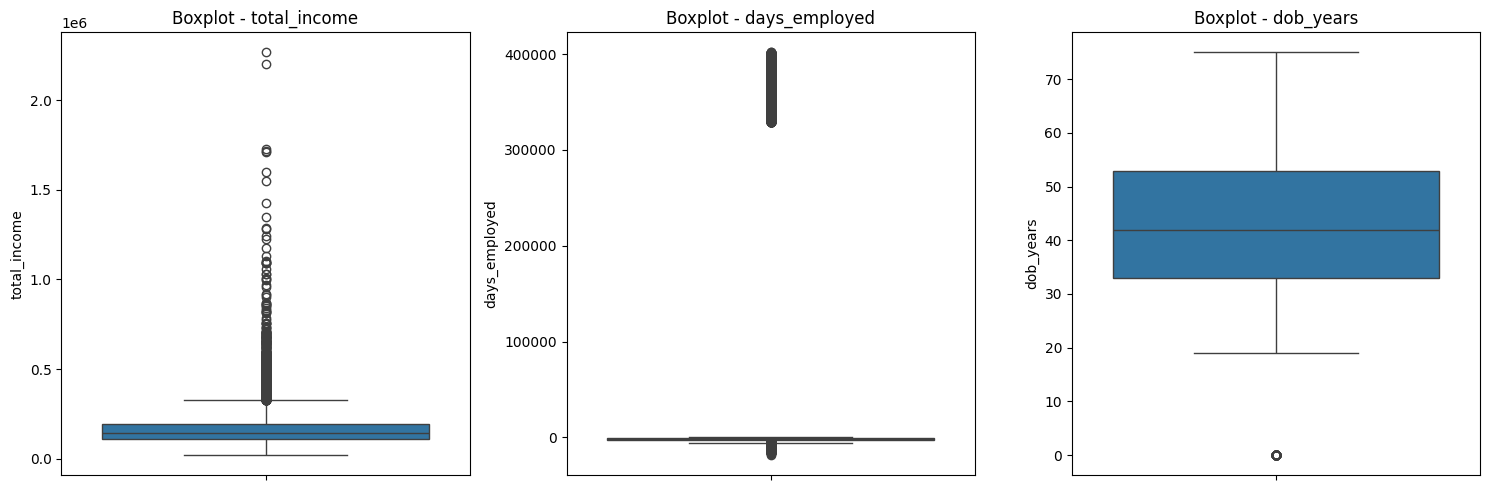

In [9]:
outlier_cols = ['total_income', 'days_employed', 'dob_years']
print(f"Analyzing outliers in: {outlier_cols}")

plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [10]:
outlier_counts = {}

for col in outlier_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers_z = df[z_scores > 3]
    outlier_counts[f'{col}_zscore'] = len(outliers_z)
    print(f"Outliers in {col} using Z-score (>3): {len(outliers_z)}")

Outliers in total_income using Z-score (>3): 311
Outliers in days_employed using Z-score (>3): 0
Outliers in dob_years using Z-score (>3): 101


In [11]:
outlier_bounds = {}

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_bounds[col] = {'lower': lower_bound, 'upper': upper_bound}
    print(f"Outliers in {col} using IQR: {len(outliers_iqr)}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

Outliers in total_income using IQR: 1131
  Bounds: [-23820.00, 327161.79]
Outliers in days_employed using IQR: 4745
  Bounds: [-5717.76, 2814.49]
Outliers in dob_years using IQR: 101
  Bounds: [3.00, 83.00]


In [12]:
Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_removed = df[(df['total_income'] >= lower_bound) & (df['total_income'] <= upper_bound)]
print(f"Original dataset shape: {df.shape}")
print(f"After removing outliers in total_income: {df_removed.shape}")

Original dataset shape: (21525, 12)
After removing outliers in total_income: (20394, 12)


In [13]:
df_capped = df.copy()

df_capped['total_income'] = np.where(df_capped['total_income'] > upper_bound, upper_bound,
                                   np.where(df_capped['total_income'] < lower_bound, lower_bound, 
                                           df_capped['total_income']))

print(f"Values capped in total_income:")
print(f"  Original range: [{df['total_income'].min():.2f}, {df['total_income'].max():.2f}]")
print(f"  Capped range: [{df_capped['total_income'].min():.2f}, {df_capped['total_income'].max():.2f}]")

Values capped in total_income:
  Original range: [20667.26, 2265604.03]
  Capped range: [20667.26, 327161.79]


In [14]:
df_transformed = df.copy()

df_transformed['total_income_log'] = np.log(df_transformed['total_income'] + 1)

print(f"Log transformation applied to total_income")
print(f"Original skewness: {df['total_income'].skew():.3f}")
print(f"Transformed skewness: {df_transformed['total_income_log'].skew():.3f}")

Log transformation applied to total_income
Original skewness: 4.196
Transformed skewness: 0.130


In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    print(f"Encoded {col}: {df_encoded[col].unique()} -> {df_encoded[f'{col}_encoded'].unique()}")


Encoded education: ['masters degree' 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' 'MASTERS DEGREE' 'bachelor degree'
 'primary education' 'Masters Degree' 'BACHELOR DEGREE' 'Bachelor Degree'
 'PRIMARY EDUCATION' 'Primary Education' 'Academic Degree'
 'ACADEMIC DEGREE' 'academic degree'] -> [12 14  9  8  4 11 13  5  2  3  6  7  1  0 10]
Encoded family_status: ['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried'] -> [2 0 4 1 3]
Encoded gender: ['F' 'M' 'XNA'] -> [0 1 2]
Encoded income_type: ['employee' 'retiree' 'partner' 'civil servant' 'unempoyed' 'entrepreneur'
 'student' 'paternity / maternity leave'] -> [1 5 3 0 7 2 6 4]
Encoded purpose: ['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building

C:\Users\Praveen SB Nair\AppData\Local\Temp\ipykernel_3732\2385401172.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['total_income'], df_capped['total_income']], labels=['Original', 'Capped'])


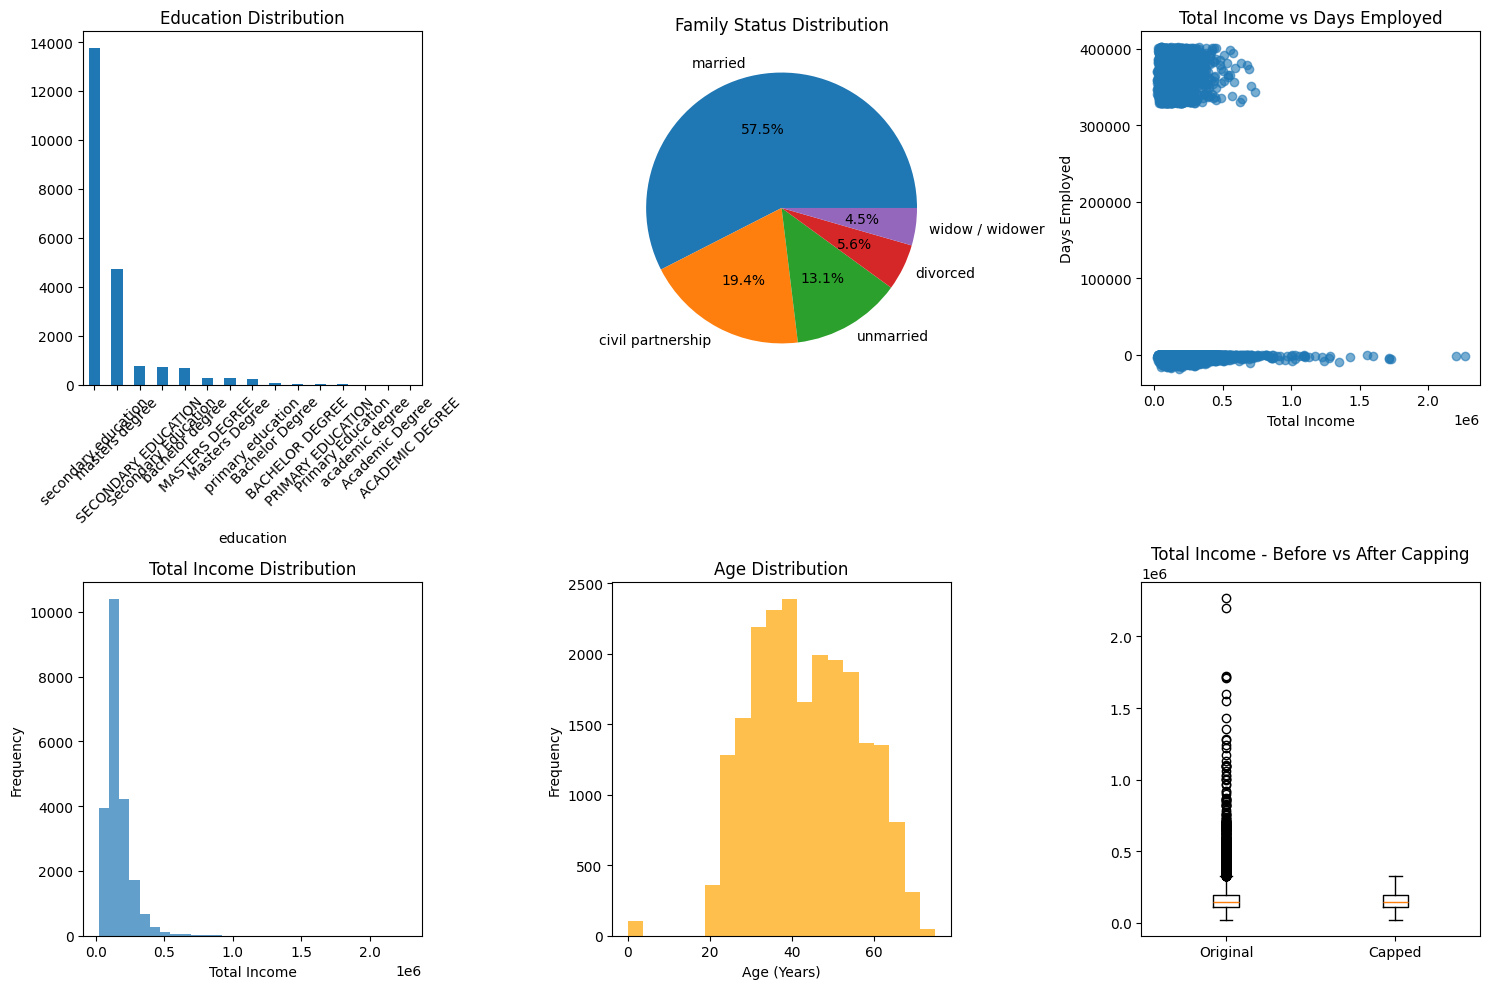

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['education'].value_counts().plot(kind='bar')
plt.title('Education Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
family_counts = df['family_status'].value_counts()
plt.pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Family Status Distribution')

plt.subplot(2, 3, 3)
plt.scatter(df['total_income'], df['days_employed'], alpha=0.6)
plt.xlabel('Total Income')
plt.ylabel('Days Employed')
plt.title('Total Income vs Days Employed')

plt.subplot(2, 3, 4)
plt.hist(df['total_income'], bins=30, alpha=0.7)
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Total Income Distribution')

plt.subplot(2, 3, 5)
plt.hist(df['dob_years'], bins=20, alpha=0.7, color='orange')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(2, 3, 6)
plt.boxplot([df['total_income'], df_capped['total_income']], labels=['Original', 'Capped'])
plt.title('Total Income - Before vs After Capping')

plt.tight_layout()
plt.show()